In [1]:
# pulled this long list from somewhere and added to it.  Not using everything here

import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
ml_tables_dir = './ML_data/'

ml_file = 'ML-table-monthly_ndvi.csv'


df_ml = pd.read_csv(ml_tables_dir + ml_file).dropna()
print(df_ml.shape)
print(df_ml.head())

# Happily, there are no null values in my ML table
print(df_ml.isnull().values.any())
# yields False

/var/folders/b9/nh8wdd1s6g12c793c67f2r9r0000gn/T/ipykernel_27854/3600256382.py:6: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ml = pd.read_csv(ml_tables_dir + ml_file).dropna()


(8572, 121)
   year  state_name county_name  yield  month      NDVI  nutr_ret_high  \
0  2017  WASHINGTON   KLICKITAT   31.8      1  0.122807           10.0   
1  2017  WASHINGTON      BENTON   82.0      1  0.122807            9.0   
2  2017  WASHINGTON      YAKIMA   60.0      1  0.122807            9.0   
3  2017  WASHINGTON       ADAMS   66.3      1  0.261364           10.0   
4  2017  WASHINGTON     LINCOLN   75.0      1  0.261364           10.0   

   suit_irrig_high_soy  AEZ_1  AEZ_2  ... month_10__PRECTOTCORR  \
0               5556.0  False  False  ...                 44.73   
1               7901.0  False  False  ...                 43.42   
2               7950.0  False  False  ...                 46.37   
3               8293.0  False  False  ...                 29.84   
4               7778.0  False  False  ...                 19.08   

  month_10__GWETROOT month_10__EVPTRNS month_10__ALLSKY_SFC_PAR_TOT  \
0           0.590333          0.043000                       1499.2  

In [3]:
corr_idx = []
df_dict = {}
for idx, (key, val) in enumerate(df_ml.items()):
    df_dict[idx] = key
print(df_dict)

for idx, i in enumerate(df_ml.corr()['yield']):
    if i > 0.1 or i < -0.1:
        corr_idx.append(idx)
print([df_dict[i] for i in corr_idx])

{0: 'year', 1: 'state_name', 2: 'county_name', 3: 'yield', 4: 'month', 5: 'NDVI', 6: 'nutr_ret_high', 7: 'suit_irrig_high_soy', 8: 'AEZ_1', 9: 'AEZ_2', 10: 'AEZ_3', 11: 'AEZ_4', 12: 'AEZ_5', 13: 'AEZ_6', 14: 'AEZ_7', 15: 'AEZ_8', 16: 'AEZ_9', 17: 'AEZ_10', 18: 'AEZ_11', 19: 'AEZ_12', 20: 'AEZ_13', 21: 'AEZ_14', 22: 'AEZ_15', 23: 'AEZ_16', 24: 'AEZ_17', 25: 'AEZ_18', 26: 'AEZ_19', 27: 'AEZ_20', 28: 'AEZ_21', 29: 'SQH_1', 30: 'SQH_2', 31: 'SQH_3', 32: 'SQH_4', 33: 'SQH_5', 34: 'SQH_6', 35: 'SQH_7', 36: 'SQH_8', 37: 'SQH_9', 38: 'SQH_10', 39: 'SQL_1', 40: 'SQL_2', 41: 'SQL_3', 42: 'SQL_4', 43: 'SQL_5', 44: 'SQL_6', 45: 'SQL_7', 46: 'SQL_8', 47: 'SQL_9', 48: 'SQL_10', 49: 'month_00__T2M_MAX', 50: 'month_00__T2M_MIN', 51: 'month_00__PRECTOTCORR', 52: 'month_00__GWETROOT', 53: 'month_00__EVPTRNS', 54: 'month_00__ALLSKY_SFC_PAR_TOT', 55: 'month_01__T2M_MAX', 56: 'month_01__T2M_MIN', 57: 'month_01__PRECTOTCORR', 58: 'month_01__GWETROOT', 59: 'month_01__EVPTRNS', 60: 'month_01__ALLSKY_SFC_PAR_T

###### df_ml_dropped = df_ml.dropna()
for idx, i in enumerate(df_ml_dropped.isnull().sum()):
    print(i, df_ml_dropped.columns[idx])
print(len(df_ml))
print(len(df_ml_dropped))

In [4]:
X = df_ml.drop(columns=['yield'])
y = df_ml.loc[:,['yield']]

print(X.shape)
print(y.shape)
 
# print(X.head())
# print(y.head())

(8572, 120)
(8572, 1)


In [5]:
# For this pipeline I will do random shuffling of the input records before separating the test set
# Choosing random_state=0 (or any specific integer) will ensure that different runs will use same shuffle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# keeping a copy of y_test, because it may get modified below
y_test_orig = y_test.copy()

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())
print()
print(y_test_orig.head())
# note: index of first row in y_test_orig is 7397)

print()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print()
print(y_test.iloc[0,0])

      year  state_name county_name  month      NDVI  nutr_ret_high  \
5139  2018       TEXAS    SAN SABA      8  0.081081           10.0   
5833  2019    OKLAHOMA   JEFFERSON      1  0.000000           10.0   
9     2017  WASHINGTON      YAKIMA      1  0.261364            9.0   
7398  2019    OKLAHOMA    WOODWARD      4  0.140000           10.0   
3718  2018      KANSAS    COMANCHE      3  0.121951           10.0   

      suit_irrig_high_soy  AEZ_1  AEZ_2  AEZ_3  ... month_10__PRECTOTCORR  \
5139               3333.0  False  False  False  ...                  7.39   
5833               7778.0  False  False  False  ...                 32.27   
9                  7950.0  False  False  False  ...                 45.71   
7398              10000.0  False  False  False  ...                 12.90   
3718              10000.0  False  False  False  ...                  5.43   

     month_10__GWETROOT month_10__EVPTRNS month_10__ALLSKY_SFC_PAR_TOT  \
5139           0.401000          0.003667 

In [6]:
X_train = X_train.drop(columns=['year','state_name','county_name'])
X_test = X_test.drop(columns=['year','state_name','county_name'])


scalerXST = StandardScaler().fit(X_train)
scaleryST = StandardScaler().fit(y_train)

X_trainST = scalerXST.transform(X_train)
y_trainST = scaleryST.transform(y_train)
X_testST = scalerXST.transform(X_test)
y_testST = scaleryST.transform(y_test)



In [7]:
# testing how inverse of the scaling is working

# basically, if scalery was your scaling function, then use scalery.inverse_transform;
#   NOTE: this works on a sequence

print(df_ml.iloc[7397]['yield'])   #  the first entry in y_test has index 1277 from df_ml
print(y_testST[0]) #.loc[[1277]])
print(scaleryST.inverse_transform(y_testST)[0])

21.6
[-0.41135633]
[35.9]


## Lasso

In [8]:
# confusingly, you set the "lambda" variable of LASSO algorithm using the parameter "alpha"
# alpha can take values between 0 and 1; using 1.0 is "full penalty", so maximum attempts to remove features
# lassoST = Lasso(alpha=1.0)
# lassoST = Lasso(alpha=0.5)
# lassoST = Lasso(alpha=0.2)
lassoST = Lasso(alpha=0.1)
# lassoST = Lasso(alpha=0.01)
lassoST.fit(X_trainST, y_trainST)

Lasso(alpha=0.1)

In [9]:
y_predST = lassoST.predict(X_testST)

print(y_predST)

[-0.15066248 -0.50146502 -0.50146502 ...  0.40376907 -0.15672449
  0.40376907]


In [10]:
import math

rmseST = math.sqrt(mean_squared_error(y_testST, y_predST))
rrmseST = rmseST / (0.5)
r2ST = r2_score(y_testST, y_predST)
print(rmseST)
print(rrmseST)
print(r2ST)

0.8726800589672826
1.7453601179345652
0.24583238582848144


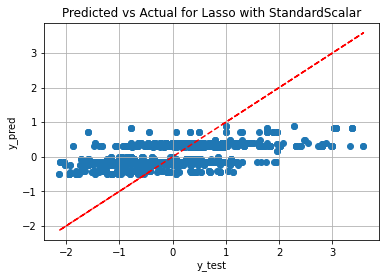

In [11]:
# from chatGPT!

import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred, descrip_of_run):
    # Check if the arrays have the same length
    if len(y_test) != len(y_pred):
        raise ValueError("The input arrays must have the same length.")

    # Create a scatter plot
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Line y_pred = y_test
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.title('Predicted vs Actual for ' + descrip_of_run)
    plt.grid(True)
    plt.show()

# Example usage
# y_test = np.array([1, 2, 3, 4, 5])
# y_pred = np.array([1.1, 1.9, 3.2, 3.8, 4.9])

plot_predictions(y_testST, y_predST, 'Lasso with StandardScalar')


## Standard Linear regression

In [12]:
linearST = LinearRegression()

In [13]:
print(type(y_trainST))

linearST.fit(X_trainST,y_trainST)

<class 'numpy.ndarray'>


LinearRegression()

0.7881566323387708
1.5763132646775415
0.3848474294129286


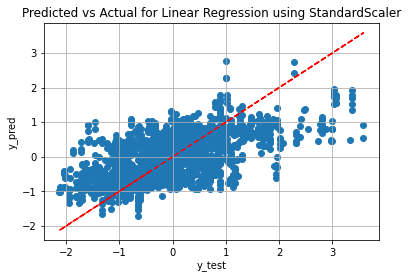

In [14]:
y_predST = linearST.predict(X_testST)

rmseST = math.sqrt(mean_squared_error(y_testST, y_predST))
rrmseST = rmseST / (0.5)
r2ST = r2_score(y_testST, y_predST)
print(rmseST)
print(rrmseST)
print(r2ST)


plot_predictions(y_testST, y_predST, 'Linear Regression using StandardScaler')


## Min Max Linear regression

In [15]:
scalerXMM = MinMaxScaler().fit(X_train)
scaleryMM = MinMaxScaler().fit(y_train)

X_trainMM = scalerXMM.transform(X_train)
y_trainMM = scaleryMM.transform(y_train)
X_testMM = scalerXMM.transform(X_test)
y_testMM = scaleryMM.transform(y_test)



In [16]:
# testing how inverse of the scaling is working with MinMaxScaler

print(df_ml.iloc[7397]['yield'])   #  the first entry in y_test has index 1277 from df_ml
print(y_testMM[0])
print(scaleryMM.inverse_transform(y_testMM)[0])

21.6
[0.30085262]
[35.9]


0.13700789747261824
0.2740157949452365
0.3922400847824318


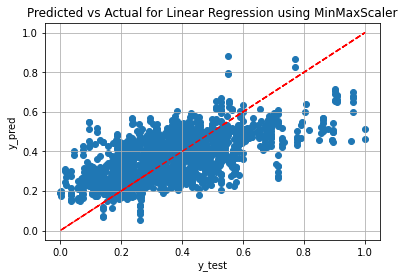

In [17]:
linearMM = LinearRegression()

linearMM.fit(X_trainMM,y_trainMM)

y_predMM = linearMM.predict(X_testMM)

rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Linear Regression using MinMaxScaler')



# Random forest

0.11381185867132043
0.22762371734264086
0.5806121144664815


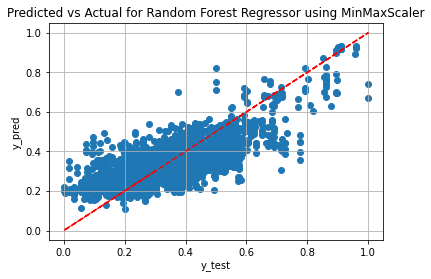

In [18]:
# random forest regressor
# regrMM = RandomForestRegressor(max_depth=2, random_state=0)
#   with depth 2
# 0.09689507428739876
# 0.1937901485747975
# 0.3314909449993473
# regrMM = RandomForestRegressor(max_depth=10, random_state=0)
#   with depth 10:
# 0.06397662809467218
# 0.12795325618934436
# 0.7085617250365808
regrMM = RandomForestRegressor(max_depth=20, random_state=0)
#   with depth 20:
# 0.06170941135743185
# 0.1234188227148637
# 0.7288518150799632

# with depth 30:
# 0.06173892378020676
# 0.12347784756041352
# 0.7285924007306489

# for some reason, need to use y_trainMM.ravel() rather than simply y_trainMM
regrMM.fit(X_trainMM, y_trainMM.ravel())

y_predMM = regrMM.predict(X_testMM)
rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Random Forest Regressor using MinMaxScaler')

0.11272344348356178
0.22544688696712356
0.5885952101141326


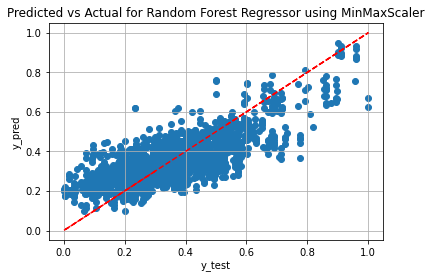

In [19]:
# random forest regressor
# regrMM = RandomForestRegressor(max_depth=2, random_state=0)
#   with depth 2
# 0.09689507428739876
# 0.1937901485747975
# 0.3314909449993473

# regrMM = GradientBoostingRegressor(max_depth=5, random_state=0)
# 0.06248140444921901
# 0.12496280889843801
# 0.7220251784274679

# regrMM = GradientBoostingRegressor(max_depth=6, random_state=0)
# 0.060561952415308665
# 0.12112390483061733
# 0.738841822368957

regrMM = GradientBoostingRegressor(max_depth=7, random_state=0)
# 0.060292341370410965
# 0.12058468274082193
# 0.7411619060993684

# regrMM = GradientBoostingRegressor(max_depth=8, random_state=0)
# 0.05947971829270693
# 0.11895943658541386
# 0.7480921507106322

# regrMM = GradientBoostingRegressor(max_depth=7, random_state=0)
# 0.06030470869466722
# 0.12060941738933444
# 0.7410557081021778

# regrMM = GradientBoostingRegressor(max_depth=10, random_state=0)
# 0.061367325378253915
# 0.12273465075650783
# 0.7318497012691665

#   with depth 20:
# 0.06170941135743185
# 0.1234188227148637
# 0.7288518150799632

# with depth 30:
# 0.06173892378020676
# 0.12347784756041352
# 0.7285924007306489

# for some reason, need to use y_trainMM.ravel() rather than simply y_trainMM
regrMM.fit(X_trainMM, y_trainMM.ravel())

y_predMM = regrMM.predict(X_testMM)
rmseMM = math.sqrt(mean_squared_error(y_testMM, y_predMM))
rrmseMM = rmseMM / (0.5)
r2MM = r2_score(y_testMM, y_predMM)
print(rmseMM)
print(rrmseMM)
print(r2MM)


plot_predictions(y_testMM, y_predMM, 'Random Forest Regressor using MinMaxScaler')
